<a href="https://colab.research.google.com/github/gustavopierre/data_science_portfolio/blob/master/Gustavo_Moreira_Pierre_Projeto_Modulo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![author](https://github.com/gustavopierre/data_science_portfolio/blob/master/author-gustavopierre.png?raw=true)](https://www.linkedin.com/in/gustavo_pierre) [![](https://img.shields.io/badge/python-3.7+-blue.svg)](https://www.python.org/downloads/release/python-365/) [![contributions welcome](https://img.shields.io/badge/contributions-welcome-brightgreen.svg?style=flat)](https://github.com/gustavopierre/data_science_portfolio/issues)

<p align="center">
  <img src="https://github.com/gustavopierre/data_science_portfolio/blob/master/Chico-Bezerra_PJG-4-1280x640.jpg?raw=true" alt="A girl taking the polio vacine" >
  <a href="http://pernambucoemfoco.com.br/jaboatao-comeca-campanha-de-multivacinacao-e-vacinacao-contra-a-poliomielite-2/">Foto de Chico Bezerra em Jaboatão em Foco</a>
</p>

# **Uma Análise da Vacinação no Brasil**
----
Em 1798, o médico britânico Edward Jenner realizou experiências com base em relatos de trabalhadores da área rural, que não tinham varíola, pois haviam pego um tipo de varíola bovina, de efeitos mais leve em humanos. Ele inoculou os dois vírus em indivíduos e percebeu que eles não adoeciam. O nome vacina tem origem no nome científico da varíola transmitida pela vaca, Variolae Vaccinae.<br/>
Por ocasiao do surto de cólera na Londres de 1854, o também médico  britânico John Snow, juntou dados dos casos de cólera e os mapeou, vindo a descobrir pontos focais deste surto que assolava o país. Este é relatado como o primeiro uso da Análise de Dados e Mapeamento Geográfico em prol da saúde e bem estar da população.<br/>
O Brasil possui um programa de imunização nacional, coordenado pelo Ministério da Saúde. Criado em 1973 com o objetivo de controlar, eliminar e  ou erradicar as doenças imunopreveníveis, mediante ações sistemáticas de vacinação da população. <br/>
Tendo em vista o reaparecimento do Sarampo no Brasil, doença que o país estava livre desde 2016, este segundo trabalho do Bootcamp da Alura acessará o conjunto de dados de cobertura de vacinas nos estados e analisará se esses dados indicam alguma queda recente nesta cobertura e sua variação ao longo dos anos. Não nos prenderemos somente ao Sarampo, mas a cobertura de vacinação de uma forma geral. Nos limitaremos a fazer as analises de quatro estados escolhidos por terem sido residência do autor: Amazonas, Rio Grande do Norte, Espirito Santo e Rio de Janeiro. <br/>
Todas as referências à confecção deste projeto estão relacionadas no final na ordem em que foram consultadas. Este projeto está disponibilizado também [neste link](https://github.com/gustavopierre/data_science_portfolio/blob/master/Gustavo_Moreira_Pierre_Projeto_Modulo_2.ipynb) do GitHub.

## **Conceitos**

### **1. Doenças Imunopreveníveis**
Uma doença imunoprevenível é aquela que pode ser evitada de forma eficaz através de vacina. São elas:
* Catapora (varicela)
* Caxumba
* Coqueluche (pertussis)
* Dengue
* Difteria
* Doença meningocócica (DM)
* Doença pneumocócica (DP)
* Febre amarela
* Febre tifoide
* Gripe (influenza)
* Haemophilus influenzae tipo b (Hib)
* Hepatite A
* Hepatite B
* Herpes zóster
* HPV
* Poliomielite
* Raiva
* Rotavírus
* Rubéola
* Sarampo
* Tétano
* Tuberculose (TB)

### **2. Cobertura**
É o percentual da população que foi vacinada. Existem metas diferentes para as diversas vacinas

<p align="left">
  <img src="https://github.com/gustavopierre/data_science_portfolio/blob/master/Vacinas_Metas.png?raw=true" alt="vacines and its goals" >
  <a href="https://antigo.saude.gov.br/images/pdf/2017/agosto/17/AACOBERTURAS-VACINAIS-NO-BRASIL---2010-2014.pdf">Imagem do Programa Nacional de Imunização</a>
</p>

## **Obtenção dos Dados**
Os dados com as coberturas anuais por estado foram obtidos no site do [DataSUS](http://tabnet.datasus.gov.br/cgi/tabcgi.exe?pni/cnv/cpniuf.def) e disponibilizado no github com nome [cobertura_estados.csv](https://github.com/gustavopierre/data_science_portfolio/raw/master/cobertura_estados.csv). As geometrias dos estados foram obtidas no [github do Gis Dataset Brasil](https://github.com/fititnt/gis-dataset-brasil/blob/master/uf/geojson/uf.json) e também foi disponibilizado no github, com nome [uf.json](https://github.com/gustavopierre/data_science_portfolio/blob/master/uf.json?raw=true). <br/>
As siglas dos estados serão carregadas direto do site [Mundo Educação](https://mundoeducacao.uol.com.br/geografia/estados-brasil.htm).

## **Configuração do Ambiente**
Para a carregamento, análise, exploração e visualização dos dados, usaremos Python. Ao longo deste projeto, foram necessárias as seguintes bibliotecas de funções que serão importadas para o ambiente abaixo:
* Pandas - biblioteca que permite ao usuário explorar, manipular e visualizar os dados de um modo bastante eficiente;
* Numpy - biblioteca usada, principalmente, para realizar cálculos em vetores multidimensionais;
* Matplotlib - biblioteca para visualização de dados;
* Seaborn - biblioteca de visualização baseada na Matplotlib;
* Folium - biblioteca que permite vizualização de dados manipulados em Python em um mapa interativo; 
* Json - biblioteca que possibilita manipular arquivos no formato JSON (JavaScript Object Notation), formato padrão aberto, leve e de fácil maipulação, largamente usado para troca de dados; e
* Datetime - biblioteca utilizada para manipular datas.

Inicia-se o código instalando o Folium que, por padrão, não vem instalado no Google Colab.

In [ ]:
print("Instalando o folium...")
!pip -q install folium
print('OK')

Instalando o folium...
OK


In [ ]:
# carregando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import folium
import json
from datetime import date
# limpando as configurações de tema do seaborn
sns.set() 
# configuração do pandas que não exibe os warnings
pd.options.mode.chained_assignment = None;
#formatando as exibições dos valores float com 3 casas decimais
pd.options.display.float_format = "{:.3f}".format

## **Análise Exploratória dos Dados**
Os dados, como dito antes, têm origem em cinco arquivos que possuem, respectivamente: 
* a geometria dos estados; e  
* os dados das coberturas das vacinas por ano e por estado.

Estes serão analisados separadamente.

### **1. Dados com a Geometria dos Estados**
O arquivo está no formato GEOJSON que, nada mais é um JSON com dados de geometria espacial, tais como pontos, linhas e polígonos, com suas coordenadas geográficas.
![Imagem do arquivo GEOJSON com a geometria dos estados](https://github.com/gustavopierre/data_science_portfolio/blob/master/visual-geojson-file.png?raw=true)

### **2. As Siglas dos Estados**
Será criado um dataframe dom os nomes dos estados e suas siglas, obtidas diretamente do site do [Mundo Educação](https://mundoeducacao.uol.com.br/geografia/estados-brasil.htm).

In [ ]:
# carregando o dataframe de siglas de estados e o preparando
siglas_estados = pd.read_html('https://mundoeducacao.uol.com.br/geografia/estados-brasil.htm', skiprows=1)
siglas_estados = siglas_estados[0]
siglas_estados

,0,1
0,Acre,AC
1,Alagoas,AL
2,Amapá,AP
3,Amazonas,AM
4,Bahia,BA
5,Ceará,CE
6,Espírito Santo,ES
7,Goiás,GO
8,Maranhão,MA
9,Mato Grosso,MT


Vamos corrigir os nomes das colunas.

In [ ]:
# definindo o nome das colunas
siglas_estados.columns=['uf', 'sigla']
# visualizando os primeiros cinco dados
siglas_estados.head()

,uf,sigla
0,Acre,AC
1,Alagoas,AL
2,Amapá,AP
3,Amazonas,AM
4,Bahia,BA


### **3. Dados da Cobertura das Vacinas por Estados e por Ano**
Como dito anteriormente, os dados foram obtidos no site do DataSUS. É necessário criar o dataframe e analisá-lo.

In [ ]:
# criando o dataframe a partir do arquivo no github
df_coberturas = pd.read_csv(
    'https://github.com/gustavopierre/data_science_portfolio/raw/master/cobertura_estados.csv',
    encoding='ISO-8859-1',
    sep=';',
    decimal=',',
    na_values='...',
    skiprows=3,
    skipfooter=20,
    engine='python'
)
#exibindo o início do dataframe
df_coberturas.head()

,Unidade da Federação,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
0,11 Rondônia,42.760,50.800,76.050,83.330,93.260,82.310,79.590,83.700,78.180,72.300,81.870,80.750,84.440,86.210,82.390,83.870,79.260,92.750,85.820,76.720,98.180,111.270,63.770,80.740,82.450,51.440,79.880
1,12 Acre,20.530,46.610,36.590,67.560,66.380,85.610,66.790,76.770,81.660,77.540,80.210,72.090,70.660,80.540,75.040,79.180,76.320,84.740,74.350,58.870,59.290,75.540,46.910,62.180,67.440,45.440,69.260
2,13 Amazonas,20.150,35.820,49.880,72.010,70.620,72.190,70.910,70.680,70.980,64.770,72.140,73.670,74.810,78.840,76.400,78.630,73.300,80.090,79.180,67.060,77.140,94.950,48.270,65.330,69.820,49.970,69.650
3,14 Roraima,64.060,88.840,89.180,80.260,97.450,93.760,83.940,72.670,78.330,72.990,80.280,78.260,74.220,76.900,71.130,80.210,75.190,84.420,73.130,60.700,82.300,105.270,57.410,74.260,78.760,48.040,75.680
4,15 Pará,32.440,40.110,51.260,67.090,67.460,82.950,77.230,83.430,82.660,80.500,97.380,89.170,86.990,87.870,84.700,84.020,81.550,84.110,77.870,67.910,71.710,67.510,41.430,57.600,57.440,37.530,73.890


No momento da criação do dataframe, foram necessárias as seguintes configuração de leitura do arquivo:
* codificação do arquivo para ISO-8859-1, para reconhecer os caracteres de letras acentuadas;
* definição do separador dos campos para ponto-e-vírgula;
* definição de que o separador de decimaís é a vírgula;
* informar ao método que se encontrar um valor de campo como  '...', deve considerar como valor nulo(NaN);
* não ler as três primeiras linhas, que contém dados do arquivo que fazem parte de um cabeçalho informativo;
* não ler as 20 últimas linhas que se referem a um rodapé informativo; e
* definir o engine como 'python' para que ele entenda o atributo 'skipfooter'.

Vamos criar uma função para preparar este dataframe para usar nas análises comparativas. Esta funçao criará um novo dataframe que:
* não contém a coluna Total;
* possua uma coluna com os anos em formato datetime;
* possua uma coluna com as unidades da federação;
* a coluna das unidades da federação não tenham o código_IBGE neles, somente o nome do estado:
* a coluna das Unidades da federação tenha nome 'uf';
* possua uma coluna com os valores de cobertura, cujo nome será 'cobertura'; e
* possua uma coluna com as siglas dos estados.

In [ ]:
def tratando_dados(entrada, siglas):
    # apagando a coluna 'Total'
    del entrada['Total']
    # definindo Unidades da Federação como índice para pivotar o dataframe
    saida = entrada.set_index('Unidade da Federação')
    # excluíndo o código do nome da uf
    saida.index = saida.index.str[3:]
    # pivotando o dataframe
    saida = saida.T
    # 'derretendo' o dataframe para ter apenas 3 colunas
    saida = saida.reset_index().melt(id_vars=['index'], value_vars=saida.columns)
    # alterando o nome das colunas
    saida.columns = ['ano', 'uf', 'cobertura']
    # transformando a coluna ano em um ano de um datetime
    saida['ano'] = saida['ano'].astype('datetime64').dt.year
    # juntando o dataframe resultante ao dataframe de siglas
    saida = pd.merge(saida, siglas, on='uf')
    
    return saida

Criando o novo dataframe a partir da execução da função

In [ ]:
# criando o novo dataframe utilizando a função
df_coberturas_novo = tratando_dados(df_coberturas, siglas_estados)
df_coberturas_novo.head()

,ano,uf,cobertura,sigla
0,1994,Rondônia,42.760,RO
1,1995,Rondônia,50.800,RO
2,1996,Rondônia,76.050,RO
3,1997,Rondônia,83.330,RO
4,1998,Rondônia,93.260,RO


Criando um dataframe com os dados dos estados selecionados.

In [ ]:
# criando uma lista dos estados selecionados
uf_selecionados = ['Amazonas', 'Rio Grande do Norte', 'Espírito Santo', 'Rio de Janeiro']
# criando um dataframe somente com os estados selecionados
df_coberturas_novo_uf_selecionados = df_coberturas_novo[df_coberturas_novo['uf'].isin(uf_selecionados)]
# verificando se os estados existentes no dataframe são, realmente, somente os que foram selecionados
df_coberturas_novo_uf_selecionados['uf'].unique()

array(['Amazonas', 'Rio Grande do Norte', 'Espírito Santo',
       'Rio de Janeiro'], dtype=object)

### **4. Analisando os Dados com Base nos Gráficos**
Serão exibidos dois gráficos (gráfico de linha e gráfico de barra), a fim de ver a relação dos percentuais de coberturas entre os estados, ano a ano.

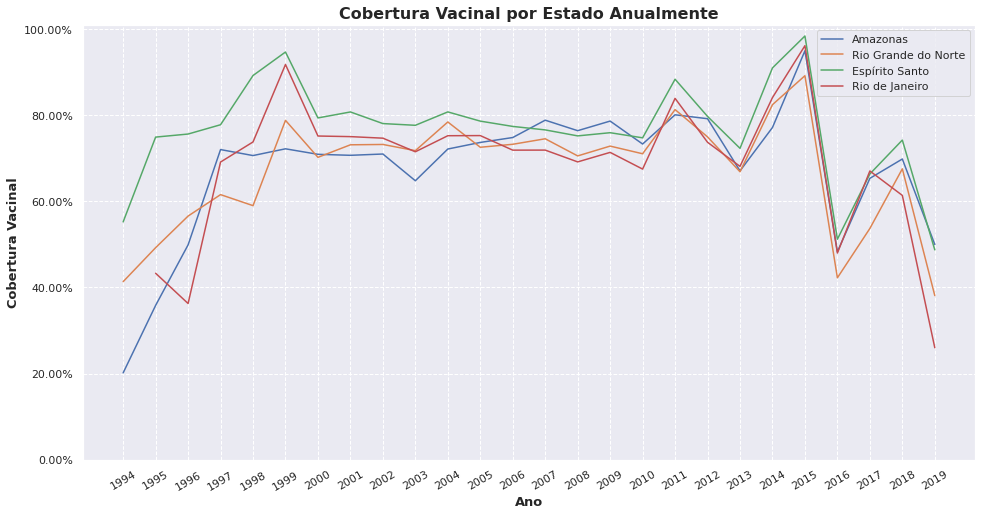

In [160]:
# gráfico de linha
plt.figure(figsize=(16,8))
ax = sns.lineplot(data=df_coberturas_novo_uf_selecionados, x='ano', y='cobertura', hue='uf')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}%'))
plt.xticks(rotation=30)
plt.ylim(0, 101)
ax.xaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0))
plt.grid(linestyle='--')
ax.set_ylabel('Cobertura Vacinal', weight='bold',fontsize=13)
ax.set_xlabel('Ano', weight='bold',fontsize=13)
ax.set_title('Cobertura Vacinal por Estado Anualmente',weight='bold',fontsize=16)
ax.legend().set_title(None)
plt.show()

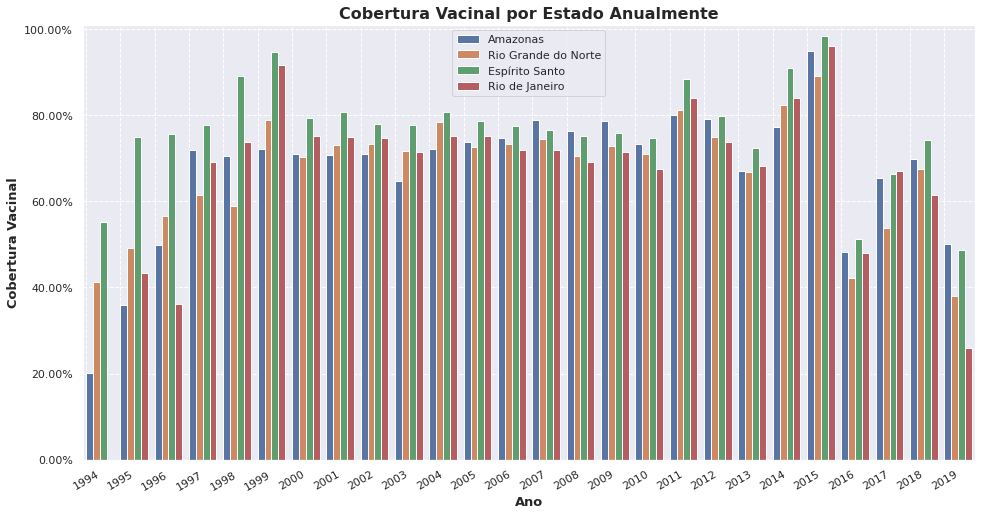

In [159]:
# gráfico de barras
plt.figure(figsize=(16,8))
ax = sns.barplot(data=df_coberturas_novo_uf_selecionados, x='ano', y='cobertura', hue='uf')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}%'))
plt.xticks(rotation=30)
plt.ylim(0, 101)
ax.xaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0))
plt.grid(linestyle='--')
ax.set_ylabel('Cobertura Vacinal', weight='bold',fontsize=13)
ax.set_xlabel('Ano', weight='bold',fontsize=13)
ax.set_title('Cobertura Vacinal por Estado Anualmente',weight='bold',fontsize=16)
ax.legend().set_title(None)
plt.show()

Os valores da cobertura vem crescendo no início do gráfico provavelemte por conta dos dados estarem em fase inicial no sistema informatizado. A partir de 1997, o Amazonas passa a ter uma relativa estabilização até um ponto de diminuição em 2002, este acompanhado pelos demais estados, com menores intensidades. 

## **Conclusão**
Os valores da cobertura vem crescendo no início do gráfico provavelemte por conta dos dados estarem em fase inicial no sistema informatizado. A partir de 1997, o Amazonas passa a ter uma relativa estabilização até um ponto de diminuição em 2002, este acompanhado pelos demais estados, com menores intensidades. A densidade demográfica menor no Amazonas, com uma dificuldade de transporte para acessar as diversas comunidades, pode ter acentuado esta queda neste estado. Os motivos de tal queda em todos os estados analisados, requer uma avaliação pormenorizada e que fica como trabalho futuro.<br/>
Em 2015 há um pico seguido de uma queda vertiginosa em 2016, com uma alta em 2017 e 2018, mas que, segundo o [artigo de André Bernardo na Veja Saúde](https://saude.abril.com.br/medicina/por-que-as-pessoas-estao-tomando-menos-vacina/), se deve a inúmeros fatores, entre eles a falta de conhecimento de doenças que já estão há algum tempo erradicadas e as fake news que levam a um movimento anti-vacinação mundial.

## **Referências**
* [Imunizações – Cobertura – Notas Técnicas](http://tabnet.datasus.gov.br/cgi/pni/cpnidescr.htm)
* [Imunizações – Cobertura – desde 1994 – Notas Técnicas](http://tabnet.datasus.gov.br/cgi/pni/Imun_cobertura_desde_1994.pdf)
* [Por que as pessoas estão tomando menos vacina](https://saude.abril.com.br/medicina/por-que-as-pessoas-estao-tomando-menos-vacina/)
* [Vacinas: as origens, a importância e os novos debates sobre seu uso](https://www.bio.fiocruz.br/index.php/br/noticias/1263-vacinas-as-origens-a-importancia-e-os-novos-debates-sobre-seu-uso?showall=1&limitstart#:~:text=Foi%20em%201798%20que%20o,menor%20impacto%20no%20corpo%20humano)
* [John Snow](https://pt.wikipedia.org/wiki/John_Snow)
* [Imunização](https://www.saude.go.gov.br/vigilancia-em-saude/imunizacao#:~:text=O%20Programa%20Nacional%20de%20Imuniza%C3%A7%C3%A3o,e%204%20hom%C3%B3logos%20(%20Imunoglobulinas))
* [O que são doenças Imunopreveníveis](https://primmevacinas.com.br/o-que-sao-doencas-imunopreveniveis/#:~:text=Doen%C3%A7as%20Imunopreven%C3%ADveis%20s%C3%A3o%20aqueles%20que,forma%20eficaz%20atrav%C3%A9s%20de%20vacinas)
*[]()